<a href="https://colab.research.google.com/github/yamini-nirwan/Learning-Python/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow
Let's explore an example of Pytorch end-to-end workflow.

In [ ]:
what_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for neural netwrorks
import matplotlib.pyplot as plt

#check Pytorch version
torch.__version__

'2.8.0+cu126'

**<u>Note</u>**: Data can be almost anything... in machine learning

Turning the inpout -> numerical encoding (tensors) -> learns representations(patterns/features/weights) -> representation outputs -> outputs

Machine learning is game of two parts:


1.   Get data into a numerical representations
2.   Build a model to learn patterns in that numerical representation.

Linear regression formula

$y = aX + b$

we'll use a linear regression formula to make a staright line with known **parameters**



In [ ]:
#create *known* parameters
weight = 0.7
bias = 0.3
#note: 0.7 and 0.3  are just the starting numbers, can be anything
#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze adds an extra square bracket
y = weight * X + bias # weight is "a" and bias is "b"

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

## Split data into training and test sets (one of the most imortant concepts in machine learning in general)

**Generalization**: The ability for a machine learning model to perform well on data it hasn't seen before.

1. Training sets (e.g. Training sets)
2. Validation sets (e.g. Practice exam)
3. Test sets (e.g. Final exam)

######**Note: validation test is used often, but not always**

In [ ]:
#create a train/test split
train_split = int(0.8 * len(X)) #80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split] #until train_split
X_test, y_test = X[train_split:], y[train_split:] #from train_split onwards

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

## Visualize our data


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

  #Are there predictions
  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s=4, label="predictions")

  #show the legend
  plt.legend(prop={"size":14});

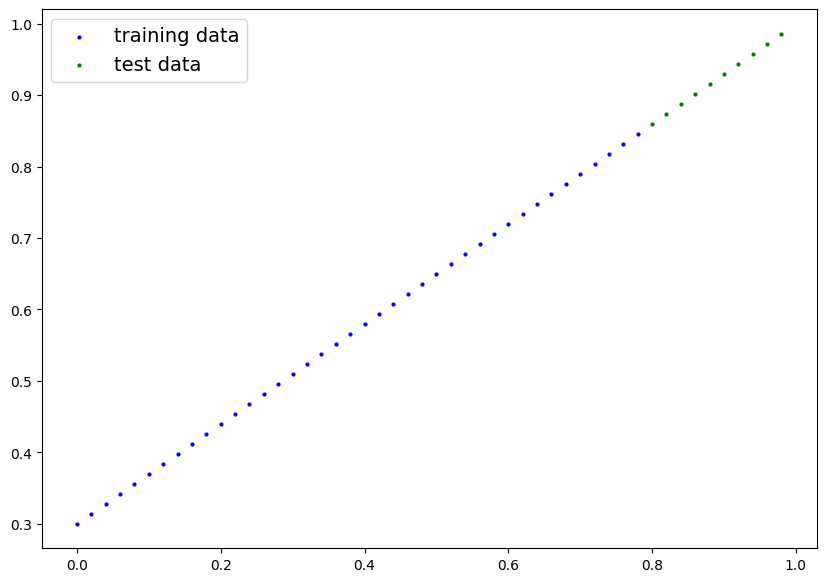

In [ ]:
plot_predictions()

## Building our first Pytorch model

Object oriented programming - Classes in Python https://realpython.com/python3-object-oriented-programming/

What our model does:
- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through **two main algorithms:**
1. **Gradient descent**
2. **Backpropagation**

How does this code work?
- **torch.nn** :  Subclass **nn.Module** (this contains all the building blocks for neural networks)

- Initalise **model parameters** to be used in various computations (these could be different layers from torch.nn, single parameters, hard-coded values or functions)

__init__ is the constructor — it runs when you create an object of this class.

super().__init__() calls the parent class’s (nn.Module) initializer so PyTorch can set up the module’s internal features.

a random tensor with torch.randn(1) — starts with a random value

wrapped in nn.Parameter(...) — tells PyTorch “this is a trainable parameter”

requires_grad=True — PyTorch should compute gradients for this during backpropagation.


- **requires_grad = True** means Pytorch will track the gradients of this specific parameter for use with <u>torch.autograd</u> and gradient descent (for many torch.nn modules, **requires_grad= True** is set by default)

- Any subclass of nn.Module needs to override **forward()** (this defines the forward computation of the model i.e. how the model processes input data.

  - You pass an input tensor x
  - The model applies the linear equation y=w×x+b
  - Returns the output tensor (the model’s predictions)








In [ ]:
import torch
from torch import nn

#create a linear regression model
class LinearRegressionModel(nn.Module): #almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()



    #Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, #start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, #can this parameter be updated via gradient descent?
                                            dtype = torch.float)) #Pytorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1, #start with a random weight and try to adjust ir to the ideal weight
                                         requires_grad = True, #can this parameter be updated via gradient descent?
                                         dtype = torch.float))
  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #<- "x" is the input data
     return self.weights * x + self.bias #this is the linear regression formula

## Pytorch model building essentials

- **torch.nn** : contains all of the buildings for computational graphs (a neural network can be considered graph)
- **torch.nn.Parameter** -  what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
- **torch.nn.Module** - The base class for all neural network modules, if you subclass it, you should overwrite forward()
- **torch.optim** - this where the optimizers in Pytorch live, they will help with gradient descent.
- **def forward()** -  All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.




## Checking the contents of our Pytorch model
Now we've created a model, let'S see what's inside.
So we can check our model parameters or what'S inside our model using .parameters().

In [ ]:
##create a random seed
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

**<u>Note</u>**: The premise of deep learning is to start with random values and make them more representativ closer to the ideal values.

## Making predictions using torch.inference_mode()
To check our model's predictive power, let's see how well it predicts y_test based on x_test.
When we pass data through our model, it's going to run through the forward() method.

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

**Note**: making predicitions can also be possibe using the context manager `torch.inference_mode()` and .
Inference mode turns off the track of the gradient i.e. how we should update our model, which means python is normally keeping the track of the data, keeping grad off makes the code faster.

**Note**:  `torch.no_grad()` works the same way as inference manager. However, inference mode is the preferred way.

In [ ]:
##Make predictions with model
##using inference mode
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
##using torch.no_grad
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

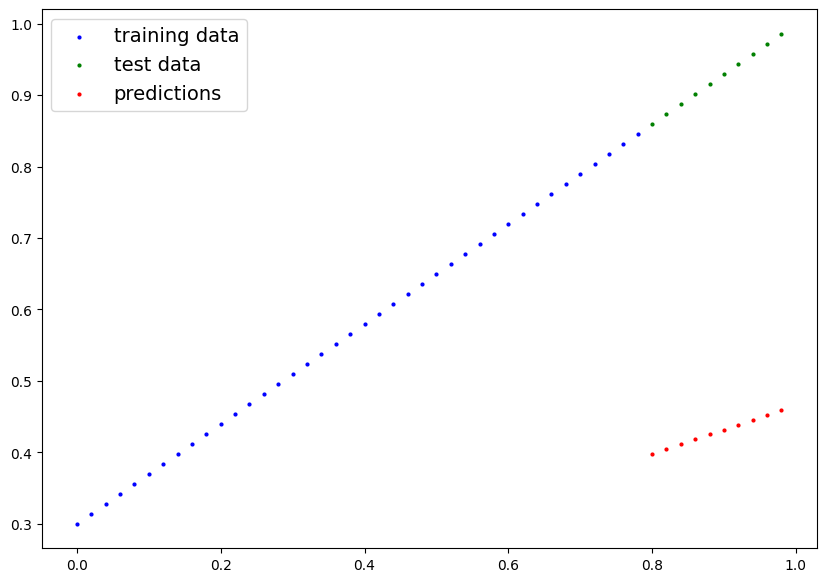

In [ ]:
plot_predictions(predictions=y_preds)

## Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models representation are is to use a **loss function**.

**NOTE**: Loss function may also be called cost function or criterian in different areas. For our case, we are going to refer to it as a loss function.

Things we need to train:

**Loss function**: A function to measure how wrong your model's predicitons are to the ideal outputs, lower is better.

**Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the lost function.

- Inside the optimizer  you'll often have to set two parameters:

    - params- the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    - `lr` (learning rate): is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small change, a large lr results in large changes)
And specifically for Pytorch we need:

- A training loop
- A testing loop

A **Parameter** is a value that the model sets itself.

In [ ]:
##Model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#Check out our model's paramters
model_0.state_dict() #in our model, we have only teo paarmeters but models can have millions of parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**<u>What is `torch.optim`</u>**

`torch.optim` is a package implementing various optimization algorithms. Most commonly used methods are already supported, and the interface is general enough, so that more sophisticated ones can be also easily integrated in the future.

**Learning rate** guides the change in the parameter i.e. smaller the parameter, smaller the change in the parameter, vice-versa

In [ ]:
#setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # Added a comma here
                            lr=0.01) # Corrected typo from paarmeters() to parameters()

**<u>What loss function and optimize should I use?</u>**

This will be problem specific. But with experience, I will get an idea of whar works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and optimize like torch.optim.SGD()will suffice.

But for a classificationn problem like classifying whether a photo is of a dog, or a cat, likely a loss function of `nn.BCELoss()` (binary cross entropy loss).

## Building a training loop and testing it in Pytorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data -  also called forward propagation.

- Feed training data into model

- Output = model predictions
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**) i.e. loss_fn tells how wrong the model is


  **Backpropagation**:

- Computes the gradients of every parameter with `requires_grad = True`

- Tells PyTorch how to change each weight to reduce loss

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)




An epoch in machine learning (including PyTorch) is a hyperparameter which means: One complete pass through the entire training dataset.

Suppose you have 100 training samples.

1 epoch = model sees all 100 samples once

5 epochs = model sees all 100 samples five times

Hyperparameter: a setting chosen by you, not learned by the model.

In [ ]:
#An epoch is one of the loop thorugh the data...(this is a hyperparameter because we have set it ourselves)
epochs = 1

##Training
# 0. loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() #train mode in Pytorch sets all parameters that require gradients to require gradients

  #1. Forward pass
  y_preds = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_preds, y_train)
  print(f"Loss: {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of teh model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so...we have to zero them above in step3

  #Testing
  model_0.eval() #turns off gradient tracking
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
   y_preds = model_0(X_test)

  ##Print out model state_dict()
  print(model_0.state_dict())


Loss: 0.31288138031959534
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})


eval() basically:
- Turns OFF gradient updates

- Used when validating or testing

- Important for layers like Dropout & BatchNorm

## Evaluating the model

Beyond visualizing, we can also evaluate our model's performance using evaluation metrics.

For regression problems, common evaluation metrics include:
*   **Mean Absolute Error (MAE)**: The average of the absolute differences between the predicted and actual values. It gives an idea of how wrong our predictions are on average.
*   **Mean Squared Error (MSE)**: The average of the squared differences between the predicted and actual values. This metric is more sensitive to large errors than MAE.
*   **Root Mean Squared Error (RMSE)**: The square root of the MSE. It has the same units as the output variable, making it easier to interpret than MSE.

Let's calculate the MAE for our model's predictions on the test data.

In [ ]:
# Evaluate the model
loss = loss_fn(y_preds, y_test)
print(f"Loss (MAE) on test data: {loss.item()}")

Loss (MAE) on test data: 0.48106518387794495


In [ ]:
#List named parameters
model_0.state_dict()

#we want to bring these values in the ouput closer to weight, bias value (0.7, 0.3) and the loss will be zero

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [ ]:
weight, bias

(0.7, 0.3)

## Training the model for more epochs

Training a model for more epochs can help it learn the patterns in the data better and potentially reduce the loss. Let's increase the number of epochs and see how it affects our model's performance.

In [ ]:
torch.manual_seed(42)

epochs = 100

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# Train model_0 for 100 epochs
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing
  model_0.eval() # this turns off different settings in the model not needed for evaluating/testing (dropout/batchnorm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
  #with torch.no_grad():# in older Pytorch code, torch.no-grad() is also used
    #1. do the forward pass
    test_loss = loss_fn(model_0(X_test), y_test)

    #2. Calculate the loss
    test_loss = loss_fn(model_0(X_test), y_test)

  # Print out what's happening every 10 epochs
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print (f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict()
    print(model_0.state_dict)

Epoch: 0 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 10 | Loss: 0.18615034222602844 | Test loss: 0.3328842222690582
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 20 | Loss: 0.08227583020925522 | Test loss: 0.2069590985774994
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 30 | Loss: 0.05181945487856865 | Test loss: 0.14023718237876892
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 40 | Loss: 0.04503796249628067 | Test loss: 0.11182951927185059
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 50 | Loss: 0.04132963344454765 | Test loss: 0.09809747338294983
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 60 | Loss: 0.03785243630409241 | Test loss: 0.08776430785655975
<bound method Module.state_dict of LinearRegressionModel()>
Epoch: 70 | Loss: 0.03441363573074341 | Test loss: 0.0794917643070221
<bound method Modu

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values # we need to convert the loss values into the numpy because they are in the tensor and matplotlib is compatible with the numpy array

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883],
       dtype=float32),
 [tensor(0.4676),
  tensor(0.3329),
  tensor(0.2070),
  tensor(0.1402),
  tensor(0.1118),
  tensor(0.0981),
  tensor(0.0878),
  tensor(0.0795),
  tensor(0.0719),
  tensor(0.0636)])

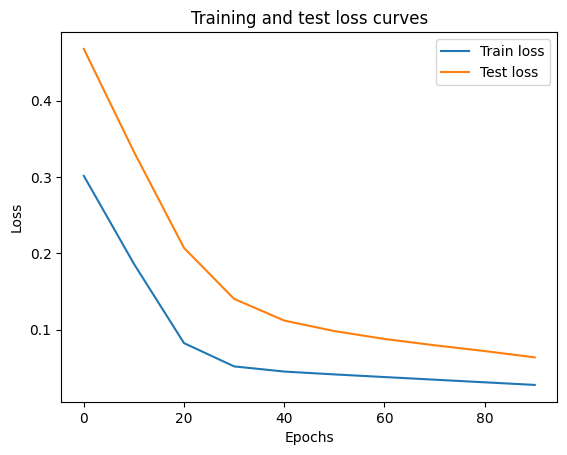

In [ ]:
# Plot the loss values
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

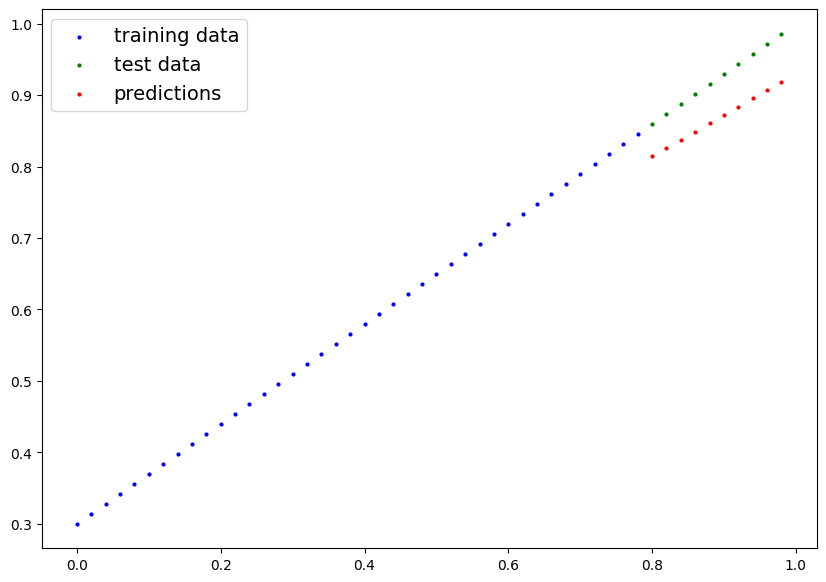

In [ ]:
# Make predictions with the updated model
with torch.inference_mode():
  y_preds_after_training = model_0(X_test)

plot_predictions(predictions=y_preds_after_training)

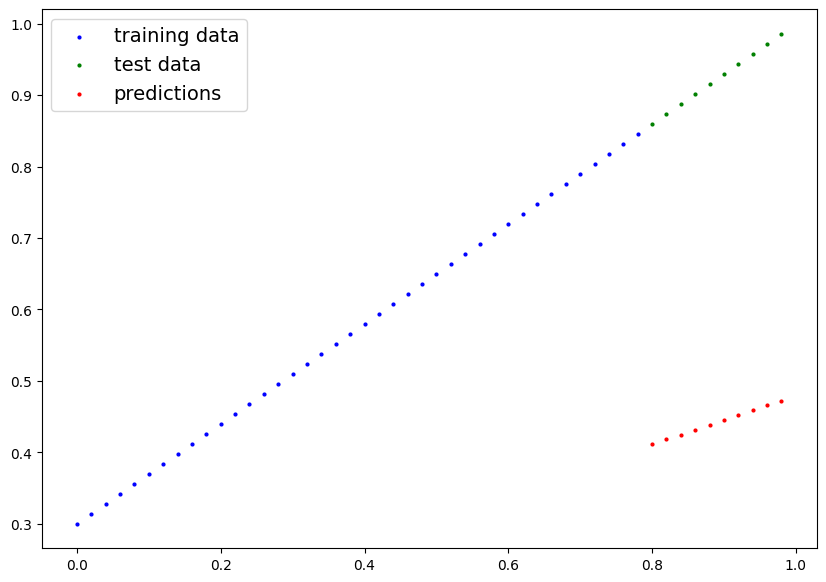

In [ ]:
plot_predictions(predictions=y_preds) #these were the old predictions

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])

## Saving a model in Pytorch

There are three main methods you should know about saving and loading models in Pytorch.

1. `torch.save()` - allows you to save a Pytorch's object in a pickle format.
2. `torch.load()` - allows you load a saved Pytorch object.
3. `torch.nn.Module.load.state_dict()`- this allows to load a model's saved state dictionary.